<a href="https://www.kaggle.com/code/mennatullaheisawy/sentimental-analysis-using-spacy-test-acc-93?scriptVersionId=190960763" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Download the required English Language Pipeline using SPACY

For more details Check SPACY Documantation:

[Spacy](https://spacy.io/models/en)

In [2]:
!pip install spacy
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 33.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.4/922.4 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 37.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 77.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 5.3 MB/s eta 0:00:00
     ━

In [5]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 3.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


## Import Needed Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Data Reading and EDA

In [7]:
df = pd.read_csv('/kaggle/input/emotion-dataset/Emotion_classify_Data.csv')
df

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [9]:
df['Emotion'].value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

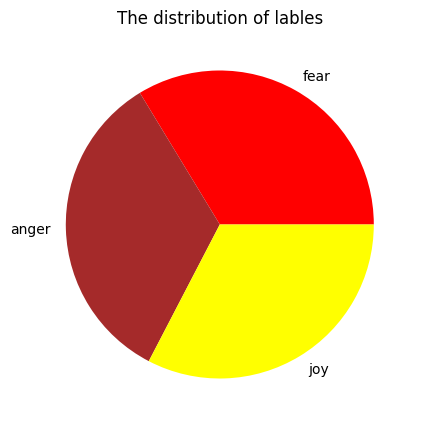

In [10]:
plt.figure(figsize=(5,5))
plt.pie(df['Emotion'].value_counts(), labels=df['Emotion'].unique(), colors=['red','brown','yellow'])
plt.title('The distribution of lables')
plt.show()

In [11]:
# To display random instances from the data
for i in range(0,len(df),7):
    print(f"The comment is : {df['Comment'][i]} \nIt's Label is: {df['Emotion'][i]}\n")
    if i > 30 :
        break

The comment is : i seriously hate one subject to death but now i feel reluctant to drop it 
It's Label is: fear

The comment is : i finally fell asleep feeling angry useless and still full of anxiety 
It's Label is: anger

The comment is : i just try not to talk to anyone when i feel irritable like that 
It's Label is: anger

The comment is : i feel much better and without the help of ice 
It's Label is: joy

The comment is : im feeling deeply overwhelmed by these ordinary tasks 
It's Label is: fear

The comment is : i go back to my point about what an easy sell getting folk to feel really virtuous for not doing what they dont want to do anyway 
It's Label is: joy



## Loading the English Laguage Pipeline

In [12]:
nlp = spacy.load("en_core_web_lg")

## Text Preprocessing

#### Exploring Different methods inside the spacy module on sample instance

In [13]:
instance = df['Comment'][20]
instance

'i hope that the next quote will be able to let my special someone knows what im feeling insecure about and understand that no matter how much i trust'

In [14]:
doc = nlp(instance)
doc

i hope that the next quote will be able to let my special someone knows what im feeling insecure about and understand that no matter how much i trust

In [15]:
# Showing the tokens found inside the instance
print([token for token in doc])

[i, hope, that, the, next, quote, will, be, able, to, let, my, special, someone, knows, what, i, m, feeling, insecure, about, and, understand, that, no, matter, how, much, i, trust]


In [16]:
# Showing how lemmatization affects each token
for token in doc:
    print(f'{token} --> {token.lemma_}')

i --> I
hope --> hope
that --> that
the --> the
next --> next
quote --> quote
will --> will
be --> be
able --> able
to --> to
let --> let
my --> my
special --> special
someone --> someone
knows --> know
what --> what
i --> I
m --> m
feeling --> feel
insecure --> insecure
about --> about
and --> and
understand --> understand
that --> that
no --> no
matter --> matter
how --> how
much --> much
i --> I
trust --> trust


In [17]:
# Showing the stop words found in the instance
for token in doc:
    if token.is_punct or token.is_stop:
        print(f'{token}')

i
that
the
next
will
be
to
my
someone
what
i
about
and
that
no
how
much
i


In [18]:
# Printing the Part of Speach of each Token
for token in doc:
    print(f'{token} --> {token.pos_}')

i --> PRON
hope --> VERB
that --> SCONJ
the --> DET
next --> ADJ
quote --> NOUN
will --> AUX
be --> AUX
able --> ADJ
to --> PART
let --> VERB
my --> PRON
special --> ADJ
someone --> PRON
knows --> VERB
what --> PRON
i --> PRON
m --> AUX
feeling --> VERB
insecure --> ADJ
about --> ADP
and --> CCONJ
understand --> VERB
that --> SCONJ
no --> ADV
matter --> ADV
how --> SCONJ
much --> ADJ
i --> PRON
trust --> VERB


In [19]:
# Showing how Normalization affects each token
for token in doc:
    print(f'{token} --> {token.norm_}')

i --> i
hope --> hope
that --> that
the --> the
next --> next
quote --> quote
will --> will
be --> be
able --> able
to --> to
let --> let
my --> my
special --> special
someone --> someone
knows --> knows
what --> what
i --> i
m --> m
feeling --> feeling
insecure --> insecure
about --> about
and --> and
understand --> understand
that --> that
no --> no
matter --> matter
how --> how
much --> much
i --> i
trust --> trust


In [20]:
def preprocessing(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        if token.is_punct or token.is_stop:
            continue
        token = token.lemma_
        tokens.append(token)
    
    return " ".join(tokens)

In [21]:
df['Preprocessed_Comment'] = df['Comment'].apply(preprocessing)
df.head()

,Comment,Emotion,Preprocessed_Comment
0,i seriously hate one subject to death but now ...,fear,seriously hate subject death feel reluctant drop
1,im so full of life i feel appalled,anger,m life feel appalled
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,joy,ve angry r feel like idiot trust place
4,i feel suspicious if there is no one outside l...,fear,feel suspicious outside like rapture happen


## Data Prepration for the Machine Learing Algorithms

1. Define X, and Y
2. Vectorize the comments inside the X using TFIDF-Vectrozier
3. Encode the Lables in Y :
    * 0 : anger
    * 1 : fear
    * 2 : joy


In [22]:
# 1
X = df['Preprocessed_Comment']
y = df['Emotion']

In [23]:
# 2
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
# 3
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 0, 1, ..., 2, 1, 0])

## Models Grid Search and Cross Validation

### 1- Logistic Regression

In [25]:
param_grid = {'penalty':['l1','l2'],
            'random_state':[42],
            'max_iter':[100, 200, 300]}
lr = LogisticRegression()

In [26]:
grid_search = GridSearchCV(lr, param_grid, cv=10, return_train_score=True )
grid_search.fit(X, y)

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'random_state': [42]},
             return_train_score=True)

In [27]:
# Get best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
print(f"Best model Accuracy Score is :{grid_search.best_score_}")

Best hyperparameters: {'max_iter': 100, 'penalty': 'l2', 'random_state': 42}
Best model Accuracy Score is :0.9262265715048177


### 2- XGBoost Classifier 

In [30]:
param_grid = {'learning_rate':['0.01','0.001'],
            'random_state':[42],
            'n_estimators':[100, 500, 1000]}
xgbc = XGBClassifier()

In [31]:
grid_search = GridSearchCV(xgbc, param_grid, cv=10)
grid_search.fit(X, y)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': ['0.01', '0.001'],
                         'n_estimators': [100, 500, 1000],
                         'random_state': [42]})

In [32]:
# Get best hyperparameters and Score of XGBoost
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
print(f"Best model Accuracy Score is :{grid_search.best_score_}")

Best hyperparameters: {'learning_rate': '0.01', 'n_estimators': 1000, 'random_state': 42}
Best model Accuracy Score is :0.8900105609211849


### 3- SVM Classifier

In [33]:
param_grid = {'kernel': ['rbf'],
              'C': [0.1, 1, 10, 15],
            'random_state':[42]}

svc = SVC()

In [34]:
grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 15], 'kernel': ['rbf'],
                         'random_state': [42]})

In [35]:
# Get best hyperparameters and Score of XGBoost
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
print(f"Best model Accuracy Score is :{grid_search.best_score_}")

Best hyperparameters: {'C': 10, 'kernel': 'rbf', 'random_state': 42}
Best model Accuracy Score is :0.9306045275691144


In [38]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
y_pred

array([1, 0, 1, ..., 2, 1, 0])

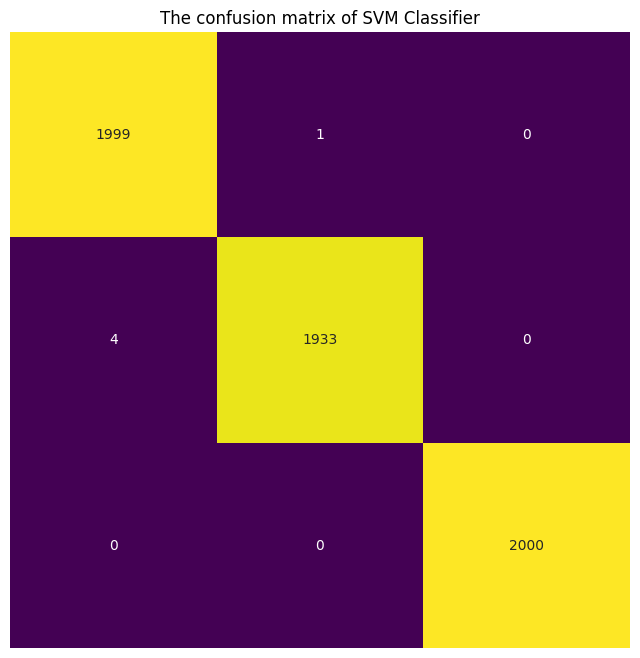

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cbar=False, cmap='viridis', fmt='0.00f')
plt.axis(False)
plt.title('The confusion matrix of SVM Classifier')
plt.show()

## The End!